<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/Congress1Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 126 (delta 39), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (126/126), 14.97 MiB | 16.77 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [3]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler

consumer_key= "DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret  = "jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"
access_token ="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret= "cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
# authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-02-01"
date2 = "2020-11-09"


text = []


def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2).items():
        print(tweet.text)
        text.append(tweet.text)
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"#congress bihar")  
           
data1 = list(zip(text))
df = pd.DataFrame(data =data1, columns =["Tweet"])

df.to_csv('cong.csv') 

Bihar Exit Polls says RJD  congress alliance  wins people mandate - Click to see also ☛  https://t.co/XwatuZy8uE… https://t.co/Zmq7QeUMr5
<--------------------------------------------------->
1
Yeh toh vote dene se phale sochna chahiye ki aap kis ko power de rahai hai , #Bihar election predictions suggest th… https://t.co/ljPuCK7nVs
<--------------------------------------------------->
2
Karnataka CM BS Yediyurappa Will Be Changed After Bihar Poll Results, Says Congress Leader Siddaramaiah… https://t.co/yUTp3FXVQR
<--------------------------------------------------->
3
#Congress terms #Bihar #ExitPolls a slap on #NDA's face... https://t.co/7n7H7mvLXw via @YahooIndia 
Following the d… https://t.co/Pl9Xjyhe8n
<--------------------------------------------------->
4
#india #bjp #Congress #BiharElections2020 #BiharPolls If BJP contested the elections in Punjab, Maharashtra and Bih… https://t.co/Cb4M68jtQj
<--------------------------------------------------->
5
So MGB is expected to win Biha

# **Importing Libraries**


In [4]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# **CLEANING CONGRESS DATASET 1**

In [5]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

166



> **Removing duplicates tweets if any.**



In [6]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)

95

In [7]:
df['Tweet'].duplicated().sum()

71

```
Number of duplicates tweets
```



In [8]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(95, 1)



```
Removed all the duplicate tweets
```





> **Removing emojis**



In [9]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)



```
From now on, all the preprocessing & modelling on tweets will be stored in the data column called 'Processed_Tweet' 
```



In [10]:
count = 0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

15

In [11]:
df.shape

(80, 2)

In [12]:
df['Processed_Tweet']

0     Bihar Exit Polls says RJD  congress alliance  ...
1     Yeh toh vote dene se phale sochna chahiye ki a...
2     Karnataka CM BS Yediyurappa Will Be Changed Af...
3     #Congress terms #Bihar #ExitPolls a slap on #N...
4     #india #bjp #Congress #BiharElections2020 #Bih...
                            ...                        
89    @ANI #RahulGandhi #BiharPolls #Congress   He i...
90    Congress leader Rahul Gandhi during a poll cam...
91    #jungleraj was removed fm Bihar by @NitishKuma...
92    @INCIndia @RahulGandhi We want development in ...
94    Bihar: Rahul Gandhi asked Votes for Sharad Yad...
Name: Processed_Tweet, Length: 80, dtype: object



>**Removing username**



In [13]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

0     Bihar Exit Polls says RJD  congress alliance  ...
1     Yeh toh vote dene se phale sochna chahiye ki a...
2     Karnataka CM BS Yediyurappa Will Be Changed Af...
3     #Congress terms #Bihar #ExitPolls a slap on #N...
4     #india #bjp #Congress #BiharElections2020 #Bih...
                            ...                        
89      #RahulGandhi #BiharPolls #Congress   He is a...
90    Congress leader Rahul Gandhi during a poll cam...
91    #jungleraj was removed fm Bihar by   w BJP, bu...
92        We want development in bihar... That's why...
94    Bihar: Rahul Gandhi asked Votes for Sharad Yad...
Name: Processed_Tweet, Length: 80, dtype: object



> **Removing URL, if any**



In [14]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

0     Bihar Exit Polls says RJD  congress alliance  ...
1     Yeh toh vote dene se phale sochna chahiye ki a...
2     Karnataka CM BS Yediyurappa Will Be Changed Af...
3     #Congress terms #Bihar #ExitPolls a slap on #N...
4     #india #bjp #Congress #BiharElections2020 #Bih...
                            ...                        
89      #RahulGandhi #BiharPolls #Congress   He is a...
90    Congress leader Rahul Gandhi during a poll cam...
91    #jungleraj was removed fm Bihar by   w BJP, bu...
92        We want development in bihar... That's why...
94    Bihar: Rahul Gandhi asked Votes for Sharad Yad...
Name: Processed_Tweet, Length: 80, dtype: object



> **Removing Hashtags but keeping the word**



In [15]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

0     Bihar Exit Polls says RJD  congress alliance  ...
1     Yeh toh vote dene se phale sochna chahiye ki a...
2     Karnataka CM BS Yediyurappa Will Be Changed Af...
3     Congress terms Bihar ExitPolls a slap on NDA's...
4     india bjp Congress BiharElections2020 BiharPol...
                            ...                        
89      RahulGandhi BiharPolls Congress   He is alre...
90    Congress leader Rahul Gandhi during a poll cam...
91    jungleraj was removed fm Bihar by   w BJP, but...
92        We want development in bihar... That's why...
94    Bihar: Rahul Gandhi asked Votes for Sharad Yad...
Name: Processed_Tweet, Length: 80, dtype: object



> **Using Preprocessor library**



In [16]:
!pip install tweet-preprocessor

In [18]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

0     Bihar Exit Polls says RJD congress alliance wi...
1     Yeh toh vote dene se phale sochna chahiye ki a...
2     Karnataka CM BS Yediyurappa Will Be Changed Af...
3     Congress terms Bihar ExitPolls a slap on NDA's...
4     india bjp Congress BiharElections2020 BiharPol...
                            ...                        
89    RahulGandhi BiharPolls Congress He is already ...
90    Congress leader Rahul Gandhi during a poll cam...
91    jungleraj was removed fm Bihar by w BJP, but i...
92    We want development in bihar... That's why thi...
94    Bihar: Rahul Gandhi asked Votes for Sharad Yad...
Name: Processed_Tweet, Length: 80, dtype: object

> **Removing any special characters, numbers, punctuations,etc..**

In [19]:
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0     Bihar Exit Polls says RJD congress alliance wi...
1     Yeh toh vote dene se phale sochna chahiye ki a...
2     Karnataka CM BS Yediyurappa Will Be Changed Af...
3     Congress terms Bihar ExitPolls a slap on NDA s...
4     india bjp Congress BiharElections     BiharPol...
                            ...                        
89    RahulGandhi BiharPolls Congress He is already ...
90    Congress leader Rahul Gandhi during a poll cam...
91    jungleraj was removed fm Bihar by w BJP  but i...
92    We want development in bihar    That s why thi...
94    Bihar  Rahul Gandhi asked Votes for Sharad Yad...
Name: Processed_Tweet, Length: 80, dtype: object

> **Converting to lowercase**

In [20]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

0     bihar exit polls says rjd congress alliance wi...
1     yeh toh vote dene se phale sochna chahiye ki a...
2     karnataka cm bs yediyurappa will be changed af...
3     congress terms bihar exitpolls a slap on nda s...
4     india bjp congress biharelections     biharpol...
                            ...                        
89    rahulgandhi biharpolls congress he is already ...
90    congress leader rahul gandhi during a poll cam...
91    jungleraj was removed fm bihar by w bjp  but i...
92    we want development in bihar    that s why thi...
94    bihar  rahul gandhi asked votes for sharad yad...
Name: Processed_Tweet, Length: 80, dtype: object



```
We still have to remove stopwords, perform lemmatization & do stemming. So let us proceed with that
```



In [21]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()



> **Removing Stop Words**



In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['the', 'too', 'off', 'below', 'who', 'until', 'what', 'for', 'is', 'ourselves', 't', 'been', 'doing', "that'll", 'most', 'him', 'in', 'was', 'll', 'itself', 'you', 'each', 'further', "couldn't", 'all', "weren't", 'few', 'over', 'under', 'its', 'didn', 'himself', 'her', 'theirs', 'were', 'with', 'no', 'should', 'myself', 'which', 'why', "don't", 'very', 'our', 'yours', 'had', 'being', "you'd", 'after', 'ma', 'm', 's', 'that', "she's", 'd', 'ours', 'there', "hadn't", 'did', 'on', "aren't", 'herself', 'nor', 'those', 'into', 'by', 'against', 'other', 'ain', "shan't", "isn't", 'don', "haven't", 'a', 'it', 'wasn', "wouldn't", 'shan', 'are', 'here', 'haven', 'to', "wasn't", 'she', "mightn't", 'while', 've', "it's", 'yourself', "needn't", 'then', 'if', 'as', 'out', 'again', 'some', 'i', 'his', 'weren', 'at', 'won', 'but', 'y', 'of', 'shouldn', 'couldn', 'before', 'than', 'more', "won't", 'where', 'mustn', 'he', 'does', 'isn', 'from', 'wouldn', 'own', "you're", 'just', 'am', 'aren', 'once', '

In [24]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

0     bihar exit polls says rjd congress alliance wi...
1     yeh toh vote dene se phale sochna chahiye ki a...
2     karnataka cm bs yediyurappa changed bihar poll...
3     congress terms bihar exitpolls slap nda face v...
4     india bjp congress biharelections biharpolls b...
                            ...                        
89    rahulgandhi biharpolls congress already hintin...
90    congress leader rahul gandhi poll campaign ara...
91    jungleraj removed fm bihar w bjp seems travell...
92                 want development bihar time congress
94    bihar rahul gandhi asked votes sharad yadav da...
Name: Processed_Tweet, Length: 80, dtype: object



> **Tokenizing**



In [25]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

0     [bihar, exit, polls, says, rjd, congress, alli...
1     [yeh, toh, vote, dene, se, phale, sochna, chah...
2     [karnataka, cm, bs, yediyurappa, changed, biha...
3     [congress, terms, bihar, exitpolls, slap, nda,...
4     [india, bjp, congress, biharelections, biharpo...
                            ...                        
89    [rahulgandhi, biharpolls, congress, already, h...
90    [congress, leader, rahul, gandhi, poll, campai...
91    [jungleraj, removed, fm, bihar, w, bjp, seems,...
92           [want, development, bihar, time, congress]
94    [bihar, rahul, gandhi, asked, votes, sharad, y...
Name: Processed_Tweet, Length: 80, dtype: object



> **Stemming**



In [26]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

0     [bihar, exit, poll, say, rjd, congress, allian...
1     [yeh, toh, vote, dene, se, phale, sochna, chah...
2     [karnataka, cm, bs, yediyurappa, chang, bihar,...
3     [congress, term, bihar, exitpol, slap, nda, fa...
4     [india, bjp, congress, biharelect, biharpol, b...
                            ...                        
89    [rahulgandhi, biharpol, congress, alreadi, hin...
90    [congress, leader, rahul, gandhi, poll, campai...
91    [jungleraj, remov, fm, bihar, w, bjp, seem, tr...
92               [want, develop, bihar, time, congress]
94    [bihar, rahul, gandhi, ask, vote, sharad, yada...
Name: Processed_Tweet, Length: 80, dtype: object

In [27]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Tweet,Processed_Tweet
0,Bihar Exit Polls says RJD congress alliance ...,"[bihar, exit, poll, say, rjd, congress, allian..."
1,Yeh toh vote dene se phale sochna chahiye ki a...,"[yeh, toh, vote, dene, phale, sochna, chahiy, ..."
2,Karnataka CM BS Yediyurappa Will Be Changed Af...,"[karnataka, yediyurappa, chang, bihar, poll, r..."
3,#Congress terms #Bihar #ExitPolls a slap on #N...,"[congress, term, bihar, exitpol, slap, nda, fa..."
4,#india #bjp #Congress #BiharElections2020 #Bih...,"[india, bjp, congress, biharelect, biharpol, b..."
...,...,...
89,@ANI #RahulGandhi #BiharPolls #Congress He i...,"[rahulgandhi, biharpol, congress, alreadi, hin..."
90,Congress leader Rahul Gandhi during a poll cam...,"[congress, leader, rahul, gandhi, poll, campai..."
91,#jungleraj was removed fm Bihar by @NitishKuma...,"[jungleraj, remov, bihar, bjp, seem, travel, m..."
92,@INCIndia @RahulGandhi We want development in ...,"[want, develop, bihar, time, congress]"


In [28]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

803

In [29]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))

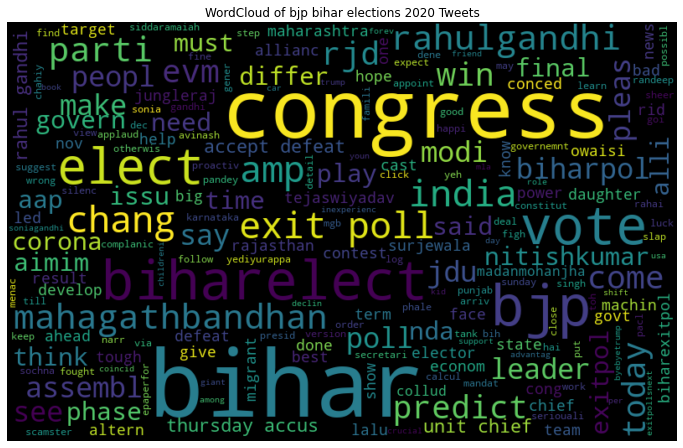

In [30]:
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of bjp bihar elections 2020 Tweets")
plt.show()

# **Sentiment Analysis**

In [31]:
from textblob import TextBlob

In [32]:
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

80

In [33]:
df['Processed_Tweet']

0     [bihar, exit, poll, say, rjd, congress, allian...
1     [yeh, toh, vote, dene, phale, sochna, chahiy, ...
2     [karnataka, yediyurappa, chang, bihar, poll, r...
3     [congress, term, bihar, exitpol, slap, nda, fa...
4     [india, bjp, congress, biharelect, biharpol, b...
                            ...                        
89    [rahulgandhi, biharpol, congress, alreadi, hin...
90    [congress, leader, rahul, gandhi, poll, campai...
91    [jungleraj, remov, bihar, bjp, seem, travel, m...
92               [want, develop, bihar, time, congress]
94    [bihar, rahul, gandhi, ask, vote, sharad, yada...
Name: Processed_Tweet, Length: 80, dtype: object

In [34]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 25
Negative Tweets: 9
Neutral Tweets 46




```
Classifying Tweets As Positive,Negetive and Neutral
```



In [35]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [36]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,Negative,Neutral,Positive,Compound
0,0.000,0.759,0.241,0.5859
1,0.000,1.000,0.000,0.0000
2,0.000,1.000,0.000,0.0000
3,0.000,0.833,0.167,0.1531
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
75,0.279,0.721,0.000,-0.4767
76,0.000,1.000,0.000,0.0000
77,0.000,1.000,0.000,0.0000
78,0.000,0.755,0.245,0.0772


In [38]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.0,0.759,0.241,0.5859,Positive
1,0.0,1.000,0.000,0.0000,Neutral
2,0.0,1.000,0.000,0.0000,Neutral
3,0.0,0.833,0.167,0.1531,Positive
4,0.0,1.000,0.000,0.0000,Neutral


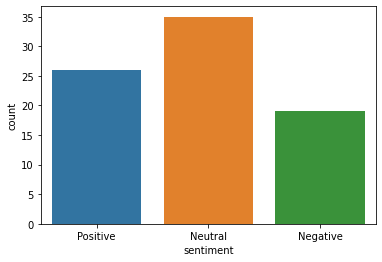

In [39]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)